In [12]:
import random
import math
import matplotlib.pyplot as plt



In [13]:
# Set the number of data points to generate
num_points = 100

# Generate random amplitude and frequency values
amplitude = random.uniform(0.5, 1.5)
frequency = random.uniform(0.05, 0.1)



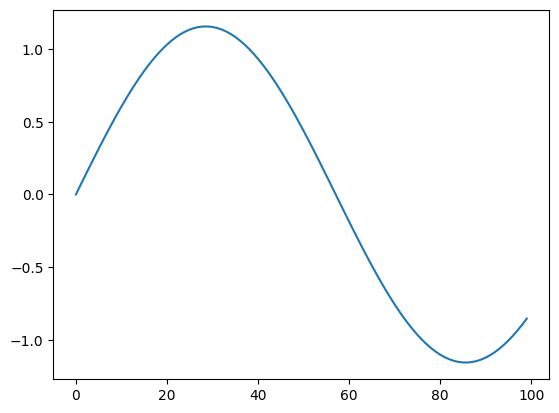

In [14]:
# Generate the x and y values for the sine wave
x_values = [i for i in range(num_points)]
y_values = [amplitude * math.sin(frequency * x) for x in x_values]

# Plot the sine wave using Matplotlib
plt.plot(x_values, y_values)
plt.show()


In [5]:
!pip install pyswarms
import pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.9 MB/s eta 0:00:00


In [15]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from pyswarm import pso

# Define the true function
def true_function(x, params):
    amplitude, frequency, phase = params
    return amplitude * np.sin(frequency * x + phase)



In [16]:
# Generate some noisy data
num_points = 100
x_data = np.linspace(0, 10, num_points)
true_params = [1.0, 0.5, 0.0]
y_data = true_function(x_data, true_params)
y_data += 0.1 * np.random.randn(num_points)




In [17]:
# Define the objective function for PSO
def objective_function(params):
    y_pred = true_function(x_data, params)
    error = y_data - y_pred
    return np.mean(error**2)

# Set the bounds for the parameters
bounds = [(0.5, 1.5), (0.05, 0.1), (-np.pi, np.pi)]


Stopping search: Swarm best objective change less than 1e-08


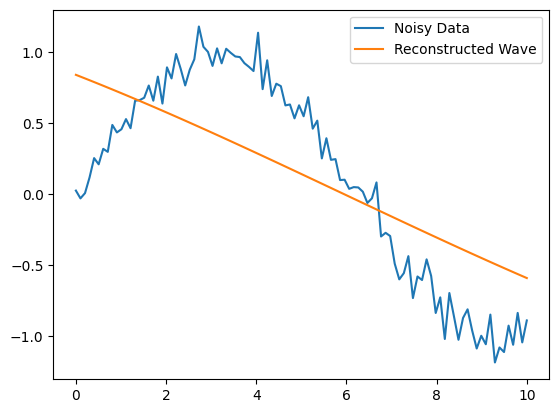

In [18]:

# Use PSO to find the optimal parameters
best_params, best_value = pso(objective_function, lb=np.array([p[0] for p in bounds]), ub=np.array([p[1] for p in bounds]), swarmsize=50, maxiter=100)

# Reconstruct the sine wave with the optimal parameters
y_pred = true_function(x_data, best_params)

# Plot the results
plt.plot(x_data, y_data, label='Noisy Data')
plt.plot(x_data, y_pred, label='Reconstructed Wave')
plt.legend()
plt.show()

In [19]:
# Define the true function
def true_function(x, params):
    amplitude, frequency, phase = params
    return amplitude * np.sin(frequency * x + phase)




In [20]:

# Generate some noisy data
num_points = 100
x_data = np.linspace(0, 10, num_points)
true_params = [1.0, 0.5, 0.0]
y_data = true_function(x_data, true_params)
y_data += 0.1 * np.random.randn(num_points)


In [21]:

# Define the objective function for PSO
def objective_function(params, x_data, y_data):
    error = 0
    for i in range(len(x_data) - 1):
        x_window = x_data[i:i+2]
        y_window = y_data[i:i+2]
        y_pred = true_function(x_window, params)
        error += np.mean((y_window - y_pred)**2)
    return error



In [22]:
# Set the bounds for the parameters
bounds = [(0.5, 1.5), (0.05, 0.1), (-np.pi, np.pi)]

# Use PSO to find the optimal parameters for each window
best_params = []
for i in range(len(x_data) - 1):
    best_params_i, best_value_i = pso(objective_function, lb=np.array([p[0] for p in bounds]), ub=np.array([p[1] for p in bounds]), args=(x_data[i:i+2], y_data[i:i+2]), swarmsize=50, maxiter=100)
    best_params.append(best_params_i)



Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm b

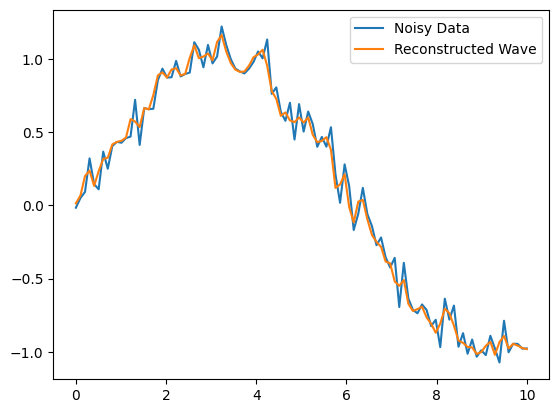

In [23]:
# Reconstruct the sine wave with the optimal parameters
y_pred = np.zeros(num_points)
for i in range(len(x_data) - 1):
    x_window = x_data[i:i+2]
    y_pred[i:i+2] = true_function(x_window, best_params[i])

# Plot the results
plt.plot(x_data, y_data, label='Noisy Data')
plt.plot(x_data, y_pred, label='Reconstructed Wave')
plt.legend()
plt.show()